In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
%matplotlib inline

In [22]:
# Cargar el dataset
data = pd.read_csv("flu_training_data_estado0.csv")
print(f"Dataset cargado con {data.shape[0]} filas y {data.shape[1]} columnas")

Dataset cargado con 1095 filas y 525 columnas


In [31]:
print("Primeras 5 filas del dataset:") #preg
print(data.head())
print("\nDistribución de clases:")
print(y.value_counts())

Primeras 5 filas del dataset:
   flu  swine  stomach  symptoms  virus  bug  strep  season  influenza  fever  \
0    0      0        0         0      0    0      0       0          0      1   
1    0      0        0         0      0    0      0       0          0      0   
2    0      0        0         0      0    0      0       0          0      0   
3    0      0        0         0      0    0      0       0          0      0   
4    0      0        0         0      0    0      0       0          0      0   

   ...  combo  tests  thinks  ankle  work  hand  complications  children  \
0  ...      0      0       0      0     0     0              0         0   
1  ...      0      0       0      0     0     0              0         0   
2  ...      0      0       0      0     0     0              0         0   
3  ...      0      0       0      0     0     0              0         0   
4  ...      0      0       0      0     0     0              0         0   

   start  aja  
0      0  

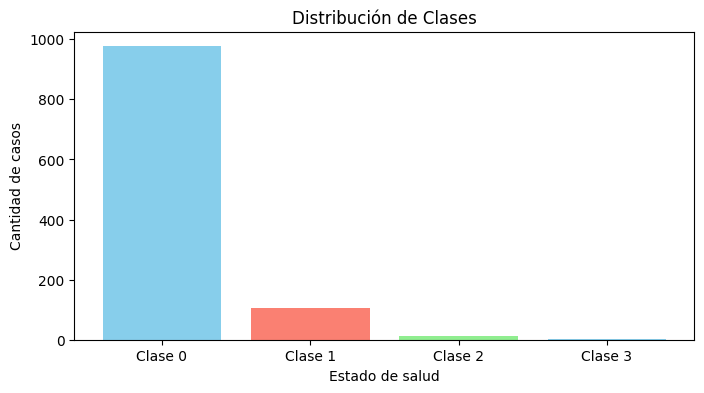

In [33]:
# Visualizar distribución de clases
plt.figure(figsize=(8, 4))
class_counts = y.value_counts().sort_index()
plt.bar(class_counts.index, class_counts.values, color=['skyblue', 'salmon', 'lightgreen'])
plt.xticks(class_counts.index, [f'Clase {i}' for i in class_counts.index])
plt.title('Distribución de Clases')
plt.ylabel('Cantidad de casos')
plt.xlabel('Estado de salud')
plt.show()

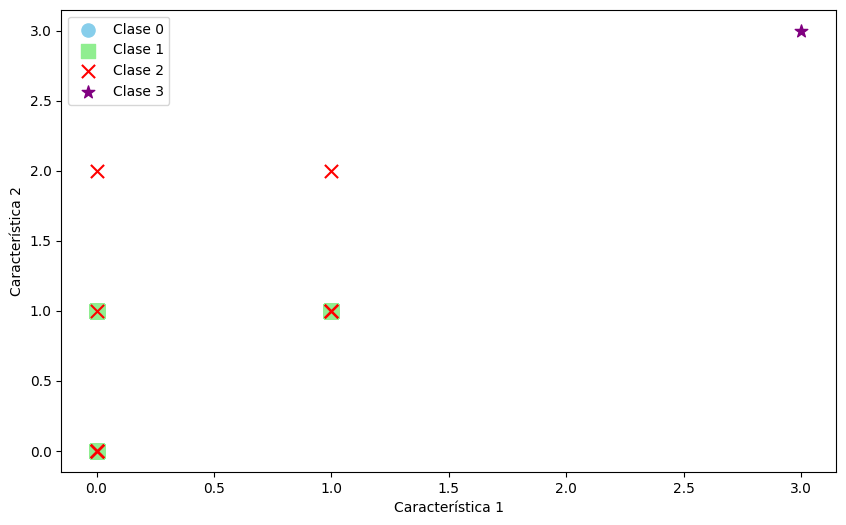

In [39]:

def plotData(X, y):
    
    plt.figure(figsize=(10, 6))
    
    markers = ['o', 's', 'x', '*']
    colors = ['skyblue', 'lightgreen', 'red', 'purple', 'orange']
   
    if X.shape[1] >= 3:
        
        for i, class_value in enumerate(sorted(set(y))):
            idx = y == class_value
            plt.scatter(X[idx].iloc[:, 0], X[idx].iloc[:, 1], 
                      marker=markers[i % len(markers)], 
                      color=colors[i % len(colors)],
                      s=90, 
                      label=f'Clase {class_value}')
        
        plt.xlabel('Característica 1')
        plt.ylabel('Característica 2')
        plt.legend()
        
# Graficamos los datos con las dos primeras características
plotData(X, y)

g(0) = 0.5


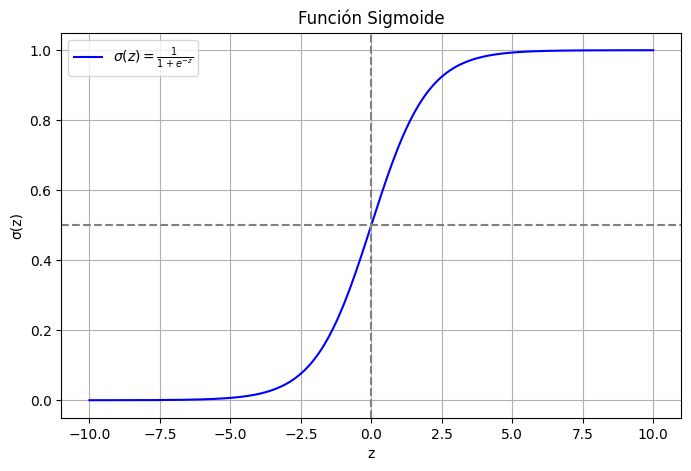

In [ ]:
# Función sigmoid
def sigmoid(z):
    
    z = np.array(z)
    return 1 / (1 + np.exp(-z))

z = 0
g = sigmoid(z)
print(f'g({z}) = {g}')


# GRAFICA
z = np.linspace(-10, 10, 200)
g = sigmoid(z)

plt.figure(figsize=(8, 5))
plt.plot(z, g, label=r"$\sigma(z) = \frac{1}{1 + e^{-z}}$", color="blue")
plt.title("Función Sigmoide")
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.grid(True)
plt.axvline(0, color="gray", linestyle="--")  # V
plt.axhline(0.5, color="gray", linestyle="--")  # H
plt.legend()
plt.show()


In [ ]:
#FORM GEN
m, n = X.shape
X_array = np.hstack((np.ones((m, 1)), X.values))

In [ ]:
# Regresion Log. Bin
if len(set(y)) > 2:
    print(f"{len(set(y))} Detectadas. Convirtiendo a un problema binario: Clase 1 vs Resto")
    y_binary = (y == 1).astype(int)
else: #//////////////////////////////////////////////////////////////////////////////
    y_binary = y


4 Detectadas. Convirtiendo a un problema binario: Clase 1 vs Resto


In [46]:
# Función para calcular el costo regresion Logistica
def calcularCosto(theta, X, y):
   
    m = y.size
    h = sigmoid(X.dot(theta.T))
    # Evitar log(0) que cause errores numéricos
    epsilon = 1e-5
    h = np.clip(h, epsilon, 1-epsilon)
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    return J


In [ ]:
# Función para calcular el gradiente de la regresion Logistica
def costFunction(theta, X, y):
    
    m = y.size
    h = sigmoid(X.dot(theta.T))
    epsilon = 1e-5
    h = np.clip(h, epsilon, 1-epsilon)
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    grad = (1 / m) * (h - y).dot(X)
    return J, grad

In [ ]:
# Implementación del descenso por el gradiente para optimizar los grados
def descensoGradiente(theta, X, y, alpha, num_iters):
    
    m = y.shape[0]
    theta = theta.copy()
    J_history = []
    
    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)
        J_history.append(calcularCosto(theta, X, y))
    
    return theta, J_history


In [86]:
# Inicializar theta y ejecutar descenso por gradiente
initial_theta = np.zeros(X_array.shape[1])
alpha = 0.01
num_iters = 1000

print(f"Ejecutando descenso por gradiente con alpha={alpha} y {num_iters} iteraciones...")
theta, J_history = descensoGradiente(initial_theta, X_array, y_binary, alpha, num_iters)

Ejecutando descenso por gradiente con alpha=0.01 y 1000 iteraciones...


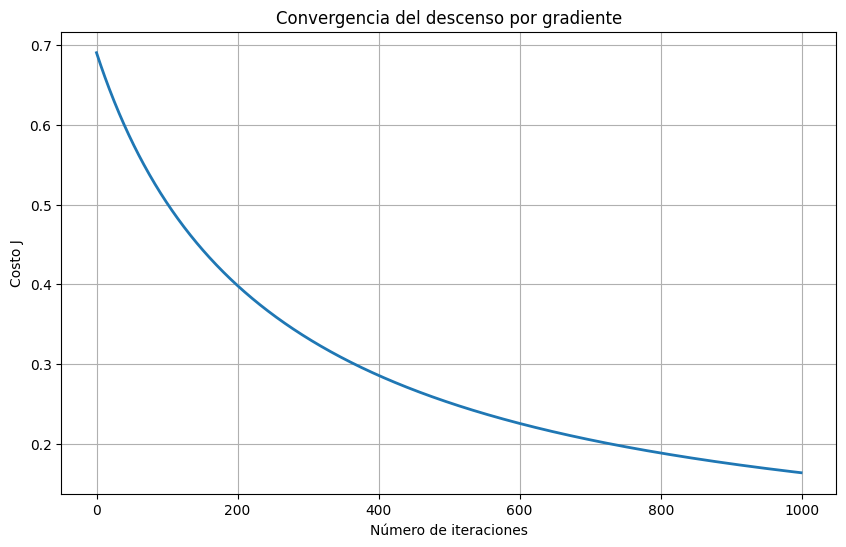

Theta calculado por descenso por gradiente:
[-1.96758229e+00  1.63169892e-01  1.28129423e-01  1.25473659e-01
  1.17749300e-01  9.38224195e-02  8.64761988e-02  7.15296448e-02
  6.93179954e-02  5.66421926e-02  5.27957807e-02  5.11153916e-02
  4.44913167e-02  3.70660216e-02  3.14182383e-02  2.56185192e-02
  2.15973559e-02  1.18805388e-02  1.02018545e-02  9.11128695e-03
 -3.48036789e-01  1.15478419e-02  1.44034311e-01 -2.87090952e-02
 -7.99888550e-03 -1.85030836e-02  9.16496710e-03 -1.09817703e-02
 -1.06506054e-02 -4.84325447e-03  0.00000000e+00 -4.24329998e-02
 -1.76434669e-03  3.04366716e-03 -8.14286716e-03  3.52229550e-03
 -4.93057518e-03 -1.50319878e-03 -1.52316951e-02  5.14317887e-03
 -5.89495321e-03 -5.36262310e-04 -4.54944169e-03 -1.70463944e-03
 -9.88844970e-03  7.78637757e-05 -6.08811886e-03 -1.91894432e-03
 -9.19263495e-03 -3.60405790e-03 -3.79209923e-02  0.00000000e+00
 -3.93160045e-03 -3.76898826e-03  0.00000000e+00  0.00000000e+00
 -1.03287206e-02 -6.98654499e-03 -1.72264157e-

In [87]:
# Graficar la convergencia del costo
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(J_history)), J_history, linewidth=2)
plt.xlabel('Número de iteraciones')
plt.ylabel('Costo J')
plt.title('Convergencia del descenso por gradiente')
plt.grid(True)
plt.show()

# Mostrar theta calculado
print('Theta calculado por descenso por gradiente:')
print(theta)

In [104]:
# Función para hacer predicciones
def predict(theta, X):
    """
    Hace predicciones usando los parámetros theta aprendidos
    """
    m = X.shape[0]
    p = np.zeros(m)
    
    # Redondear la probabilidad para obtener 0 o 1
    p = np.round(sigmoid(X.dot(theta.T)))
    return p


In [105]:
# Calcular precisión en conjunto de entrenamiento
p = predict(theta, X_array)
accuracy = np.mean(p == y_binary) * 100
print(f'Precisión en el conjunto de entrenamiento: {accuracy:.2f}%')

Precisión en el conjunto de entrenamiento: 97.08%


In [90]:
# Función para hacer predicción con un nuevo ejemplo
def hacer_prediccion(theta, caracteristicas, X_orig):
    """
    Hacer una predicción para un nuevo ejemplo
    """
    # Asegurarse de que las características estén en el mismo formato que los datos de entrenamiento
    if len(caracteristicas) != X_orig.shape[1]:
        print(f"Error: El ejemplo debe tener {X_orig.shape[1]} características.")
        return None
    
    # Añadir el término de intercepción (1)
    X_prueba = np.concatenate(([1], caracteristicas))
    
    # Calcular probabilidad
    prob = sigmoid(np.dot(X_prueba, theta))
    
    resultado = "ENFERMARÁ" if prob >= 0.5 else "NO SE ENFERMARÁ"
    
    print("\n=== RESULTADO DE PREDICCIÓN ===")
    print(f"Probabilidad de que la persona se enferme: {prob*100:.2f}%")
    print(f"Probabilidad de que la persona no se enferme: {(1-prob)*100:.2f}%")
    print(f"Resultado de la prueba: {int(prob >= 0.5)} -> {resultado}")
    print("===============================")
    
    return prob


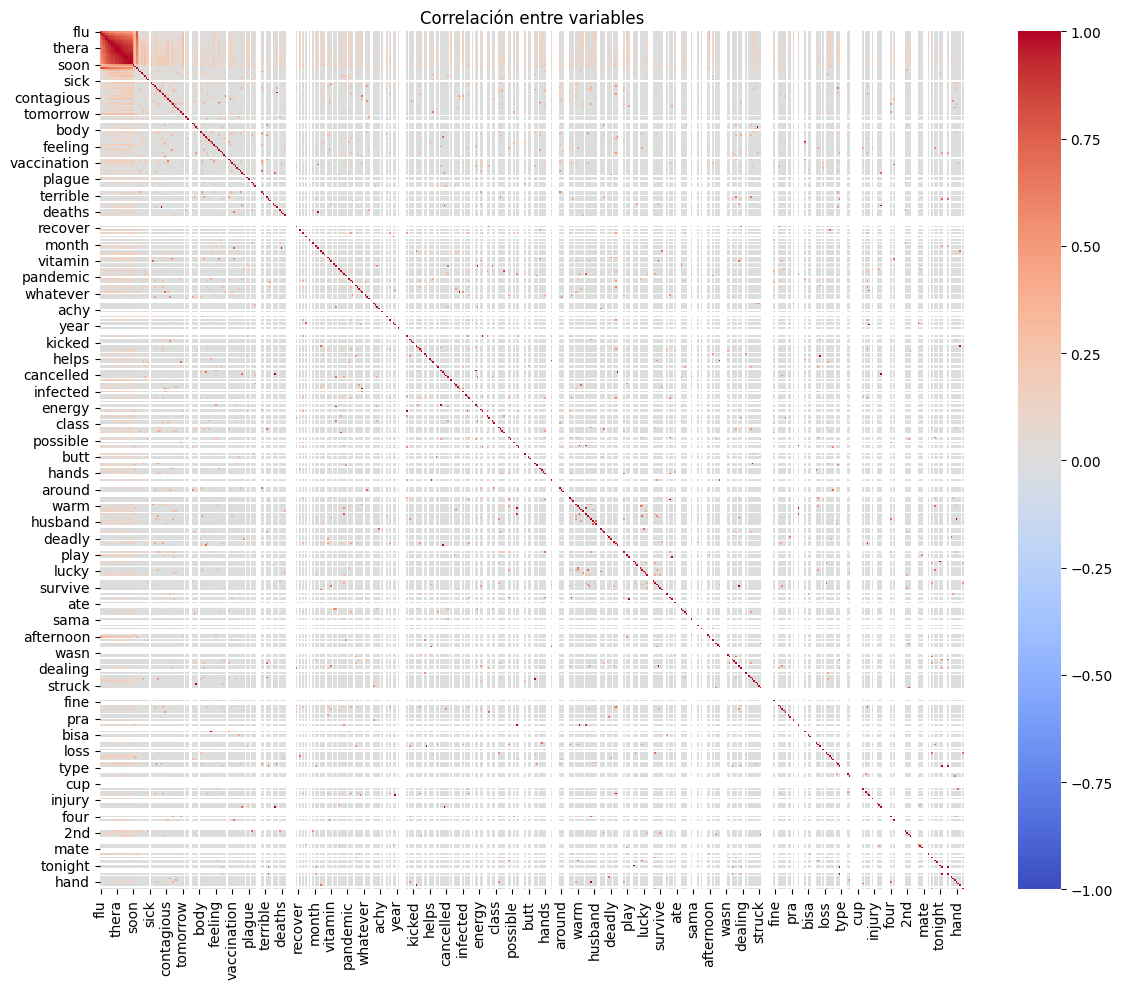

In [106]:
df = pd.read_csv("flu_training_data_estado0.csv")

correlation_matrix = df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlación entre variables")
plt.tight_layout()
plt.show()

In [154]:
# Ejemplo de uso con una muestra aleatoria del dataset
muestra_idx = np.random.randint(0, len(X))
muestra = X.iloc[muestra_idx].values
etiqueta_real = y.iloc[muestra_idx]

print(f"\nProbando con una muestra aleatoria (índice {muestra_idx}) del dataset:")
print(f"Etiqueta real: {etiqueta_real}")
prob = hacer_prediccion(theta, muestra, X)


Probando con una muestra aleatoria (índice 171) del dataset:
Etiqueta real: 0

=== RESULTADO DE PREDICCIÓN ===
Probabilidad de que la persona se enferme: 12.26%
Probabilidad de que la persona no se enferme: 87.74%
Resultado de la prueba: 0 -> NO SE ENFERMARÁ


In [163]:
print(f"\nProbando con una muestra aleatoria (índice {muestra_idx}) del dataset:")
print(f"Etiqueta real: {etiqueta_real}")
prob = hacer_prediccion(theta, muestra, X)


Probando con una muestra aleatoria (índice 171) del dataset:
Etiqueta real: 0

=== RESULTADO DE PREDICCIÓN ===
Probabilidad de que la persona se enferme: 12.26%
Probabilidad de que la persona no se enferme: 87.74%
Resultado de la prueba: 0 -> NO SE ENFERMARÁ
